## Lab Session: Pandas & Matplotlib
### Introduction

You have been asked by a supermarket chain to analyse historical sales data for several stores, where each store contains many departments. For this, we will be using pandas to create the dataframes, and matplotlib to visualise our data.

As always, we put our import statements at the top of any script. The convention for pandas and matplotlib is to write:

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

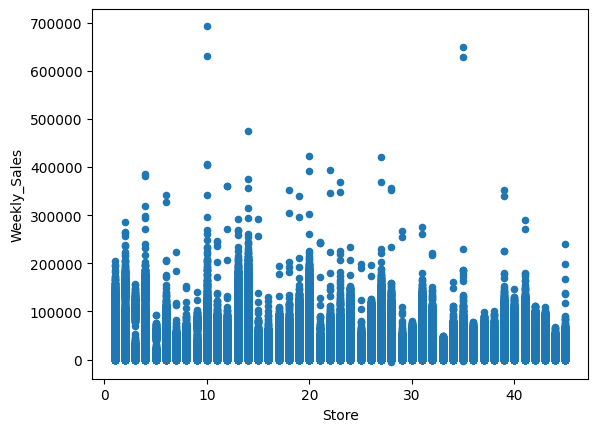

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

file_path =  'Week 9 files/'

file_name = 'sales.csv'
sales = pd.read_csv(file_path + file_name)
# This should open a new Window that you can customize
sales.plot.scatter(x='Store', y='Weekly_Sales')


### Exercise 1: Data Exploration

Download the file 'sales.csv' from Blackboard. Answer these questions using Pandas:

    1. How many stores are in the dataset ?

Tip: You can use the '.unique()' method to get all unique elements of a column.

    2. Are the mean weekly sales higher or lower on holidays?

Tip: Use Boolean indexing

    3. You are asked to send an Excel file to each department with the sales data for that department in all stores only for the year 2011. The name of the file should be ‘dept-N-sales-YEAR.csv’, where N is the ID number of the department and YEAR is 2011.

Tip: You can take a slice for a whole year by indexing with ‘2011-01-01’:’2011-12-31’

    4. You have to do Q3 again for year 2012.

Tip: Convert the code in Q3 into a function that takes the year as a parameter.

In [3]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [6]:
print("\nThere are", len(sales['Store'].unique()), "stores.\n")


There are 45 stores.



In [ ]:
# Mean wweekly sales on holiday 
sales["Date"] = pd.to_datetime(sales["Date"])
sales.index = sales["Date"] # set datetime as index
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 16.5 MB


In [10]:
## Boolean indexing
mean_sales_holidays = sales[sales["IsHoliday"]]['Weekly_Sales'].mean()
mean_sales_non_holidays = sales[~sales["IsHoliday"]]['Weekly_Sales'].mean()

if mean_sales_holidays > mean_sales_non_holidays:
    answer = "higher"
else:
    answer = "lower"

print("\nMean sales on holidays =", mean_sales_holidays, "\n")
print("Mean sales on non-holidays =", mean_sales_non_holidays, "\n")
print("Sales are", answer, "on holidays.\n")


Mean sales on holidays = 17035.823187350394 

Mean sales on non-holidays = 15901.445069008367 

Sales are higher on holidays.



In [16]:
# Sending excel file

def create_dept_sales_files(sales, year, path):
    year = str(year)
    unique_depts = sales['Dept'].unique()
    for dept in unique_depts:
        subdf =  sales[sales['Dept'] == dept]
        subdf = subdf.sort_index()  # sort the index before slicing
        subdf = subdf.loc[year + '-01-01': year + '-12-31', :] # slice for the year
        subdf = subdf.drop(['Dept'], axis=1)
        filename = "dept-" + str(dept) + "-sales-" + year + ".csv"
        subdf.to_csv(path + filename)

    print(len(unique_depts), "files created.", str(year), "at folder", path)

path = 'Week 9 files/'
create_dept_sales_files(sales, 2011, path)
        

81 files created. 2011 at folder Week 9 files/



### Exercise 2: Plotting from a Dataframe

1. Load the sales.csv data into a pandas dataframe. Convert the date column to a datetime format, and then set this to be used as the index.
2. Plot (just a line graph) the weekly sales against the date for store #1 and department #1.
3. Create a boxplot of the weekly sales for each store.
4. Create a scatter plot of the weekly sales against store number, for sales before "2011-01-01"
5. Write a function that takes as arguments the dataframe, a list of store numbers and a list of department numbers. This function should produce one plot (similar to the one in Q3) with boxplots of the weekly sales of all departments specified for each store specified (grouped by store). Hint: use .isin() to select several stores/depts.

